## Comparison of calculated vs. provided Angstrom coeffs (440-870) Aeronet V3

In [1]:
import pyaerocom as pya
pya.change_verbosity('critical')

VARS = ['ang4487aer', 'ang4487aer_calc', 'od550aer']
FILTER_NAME = 'WORLD-noMOUNTAINS'
TS_TYPE = 'daily'
YEAR = 2010

start_str = str(YEAR) 
stop_str = '{}-12-31 23:59:00'.format(YEAR) 

2018-08-29 13:06:16,217:INFO:
Reading aliases ini file: /home/jonasg/github/pyaerocom/pyaerocom/data/aliases.ini
2018-08-29 13:06:17,003:WARNING:
geopy library is not available. Aeolus data read not enabled


### Aeronet V3 Level 2 and Level 1.5

Import data into 2 instance of ``UngriddedData`` class of pyaerocom.

In [2]:
reader = pya.io.ReadUngridded()
reader.logger.setLevel('CRITICAL')

data_l2 = reader.read_dataset(pya.const.AERONET_SUN_V3L2_AOD_DAILY_NAME,
                             vars_to_retrieve=VARS)
data_l15 = reader.read_dataset(pya.const.AERONET_SUN_V3L15_AOD_DAILY_NAME,
                             vars_to_retrieve=VARS)

In [4]:
print(data_l2)
print(data_l15)


Pyaerocom UngriddedData
-----------------------
Contains networks: ['AeronetSunV3Lev2.daily']
Contains variables: ['ang4487aer', 'ang4487aer_calc', 'od550aer']
Contains instruments: []
Total no. of stations: 1165

Pyaerocom UngriddedData
-----------------------
Contains networks: ['AeronetSunV3Lev1.5.daily']
Contains variables: ['ang4487aer', 'ang4487aer_calc', 'od550aer']
Contains instruments: []
Total no. of stations: 1278


Apply altitude filter (i.e. extract all stations that are below 1000 m altitude).

In [5]:
regfilter = pya.Filter(FILTER_NAME)
data_l2 = regfilter(data_l2)
data_l15 = regfilter(data_l15)

In [6]:
print(data_l2)
print(data_l15)


Pyaerocom UngriddedData
-----------------------
Contains networks: ['AeronetSunV3Lev2.daily']
Contains variables: ['ang4487aer', 'ang4487aer_calc', 'od550aer']
Contains instruments: []
Total no. of stations: 988
Filters that were applied:
 Filter time log: 20180829130646
	stat_lon: [-180, 180]
	stat_lat: [-90, 90]
	stat_alt: [-1000000.0, 1000.0]

Pyaerocom UngriddedData
-----------------------
Contains networks: ['AeronetSunV3Lev1.5.daily']
Contains variables: ['ang4487aer', 'ang4487aer_calc', 'od550aer']
Contains instruments: []
Total no. of stations: 1081
Filters that were applied:
 Filter time log: 20180829130719
	stat_lon: [-180, 180]
	stat_lat: [-90, 90]
	stat_alt: [-1000000.0, 1000.0]


Convert all stations to instances of ``StationData`` class (containing time series for all stations). 

In [7]:
stat_data_l2 = data_l2.to_station_data_all(vars_to_convert=VARS, 
                                           start=start_str,
                                           stop=stop_str,
                                           freq=TS_TYPE)

In [8]:
stat_data_l15 = data_l15.to_station_data_all(vars_to_convert=VARS, 
                                             start=start_str,
                                             stop=stop_str,
                                             freq=TS_TYPE)

Iterate over all ``StationData`` objects in the two lists and extract data for ``ang4487aer`` (calculated and from files).

In [9]:
stat_ok_l2 = 0
ang4487aer_file_l2 = []
ang4487aer_calc_l2 = []
for stat in stat_data_l2:
    if stat is not None:
        ang4487aer_file_l2.extend(stat.ang4487aer)
        ang4487aer_calc_l2.extend(stat.ang4487aer_calc)
        stat_ok_l2 += 1

stat_ok_l15 = 0
ang4487aer_file_l15 = []
ang4487aer_calc_l15 = []
for stat in stat_data_l15:
    if stat is not None:
        ang4487aer_file_l15.extend(stat.ang4487aer)
        ang4487aer_calc_l15.extend(stat.ang4487aer_calc)
        stat_ok_l15 += 1

Text(0.5,1,'AERONET V3 L2 (2010)')

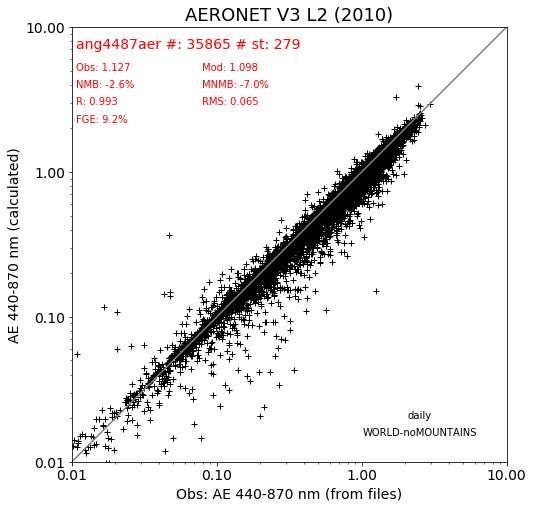

In [10]:
ax = pya.plot.plotscatter_new.plot_scatter(model_vals=ang4487aer_calc_l2,
                                          obs_vals=ang4487aer_file_l2,
                                          model_id='AE 440-870 nm (calculated)', 
                                          obs_id='AE 440-870 nm (from files)',
                                          var_name='ang4487aer',
                                          start=start_str, 
                                          stop=stop_str, 
                                          ts_type=TS_TYPE, 
                                          stations_ok=stat_ok_l2,
                                          filter_name=FILTER_NAME)
ax.set_title('AERONET V3 L2 (2010)')

Text(0.5,1,'AERONET V3 L1.5 (2010)')

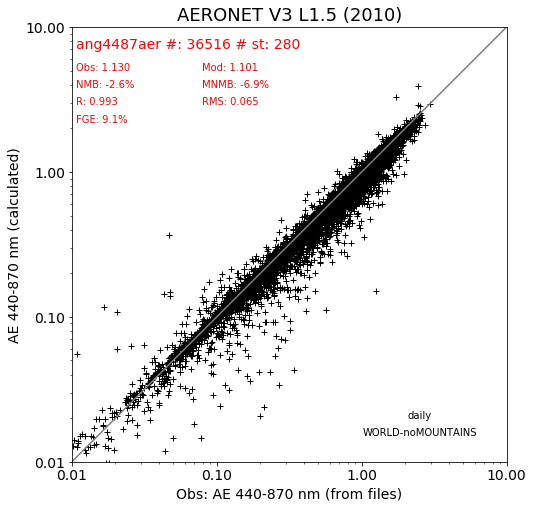

In [11]:
ax = pya.plot.plotscatter_new.plot_scatter(model_vals=ang4487aer_calc_l15,
                                           obs_vals=ang4487aer_file_l15,
                                           model_id='AE 440-870 nm (calculated)', 
                                           obs_id='AE 440-870 nm (from files)',
                                           var_name='ang4487aer',
                                           start=start_str, 
                                           stop=stop_str, 
                                           ts_type=TS_TYPE, 
                                           stations_ok=stat_ok_l15,
                                           filter_name=FILTER_NAME)
ax.set_title('AERONET V3 L1.5 (2010)')